<a href="https://colab.research.google.com/github/Saifullah785/machine-learning-engineer-roadmap/blob/main/Lecture_36_Handling_missing_data_Numerical_Data_Simple_Imputer/Lecture_36_Handling_missing_data_Numerical_Data_Simple_Imputer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Handling Missing Numerical Data**

**1.1**

Univariate Imputation

Multivariate Imputation

# **2.Mean /Median Imputation**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


In [4]:
df= pd.read_csv('/content/titanic_toy.csv')

In [5]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [7]:
df.isnull().mean()

,0
Age,0.198653
Fare,0.050505
Family,0.000000
Survived,0.000000


In [8]:
x= df.drop(columns=['Survived'])
y=df['Survived']


In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
x_train.shape, x_test.shape

((712, 3), (179, 3))

In [11]:
x_train.isnull().mean()

,0
Age,0.196629
Fare,0.050562
Family,0.000000


In [12]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()

mean_fare = x_train['Fare'].mean()
median_fare = x_train['Fare'].median()

In [13]:
x_train['Age_median']=x_train['Age'].fillna(median_age)
x_train['Age_mean']=x_train['Age'].fillna(mean_age)

x_train['Fare_median']=x_train['Fare'].fillna(median_fare)
x_train['Fare_mean']=x_train['Fare'].fillna(mean_fare)

In [14]:
x_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
649,23.0,NaN,0,23.0,23.0,14.4000,32.517788
18,31.0,18.0000,1,31.0,31.0,18.0000,18.000000
374,3.0,21.0750,4,3.0,3.0,21.0750,21.075000
786,18.0,7.4958,0,18.0,18.0,7.4958,7.495800
530,2.0,26.0000,2,2.0,2.0,26.0000,26.000000


In [15]:
print('Original Age variable variance: ',x_train['Age'].var())
print('Age imputed with median variable variance: ',x_train['Age_median'].var())
print('Age imputed with mean variable variance: ',x_train['Age_mean'].var())

print('Original Fare variable variance: ',x_train['Fare'].var())
print('Fare imputed with median variable variance: ',x_train['Fare_median'].var())
print('Fare imputed with mean variable variance: ',x_train['Fare_mean'].var())
#

Original Age variable variance:  210.2517072477438
Age imputed with median variable variance:  169.20731007048096
Age imputed with mean variable variance:  168.8519336687225
Original Fare variable variance:  2761.031434948639
Fare imputed with median variable variance:  2637.01248167777
Fare imputed with mean variable variance:  2621.2323749512393


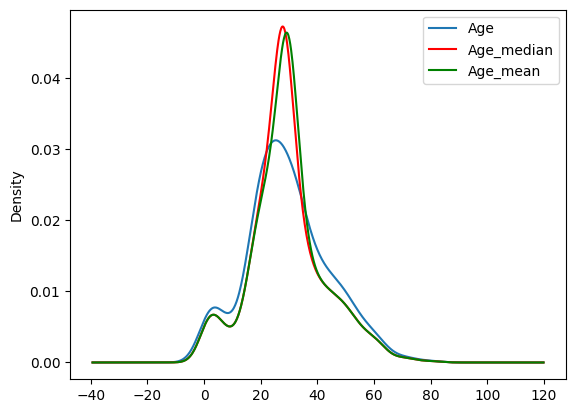

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
x_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

#add Legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

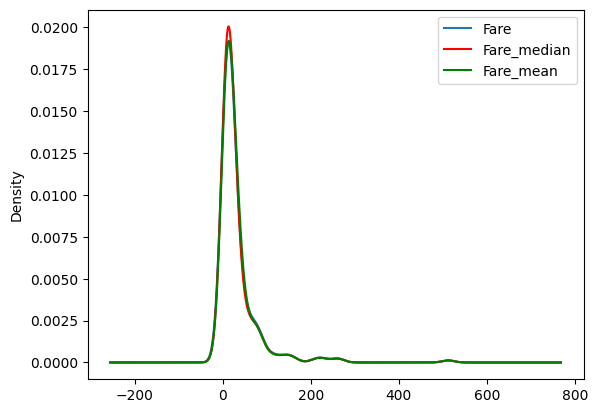

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
x_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

#add Legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

In [18]:
# cov variance
x_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,70.082085,71.193767
Fare,75.481375,2761.031435,18.599163,63.938058,60.224654,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.587710,-5.616299,17.672035,17.657433
Age_median,210.251707,63.938058,-5.587710,169.207310,168.851934,59.728510,60.700688
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,56.282518,57.175304
Fare_median,70.082085,2761.031435,17.672035,59.728510,56.282518,2637.012482,2621.232375
Fare_mean,71.193767,2761.031435,17.657433,60.700688,57.175304,2621.232375,2621.232375


In [19]:
# corr
x_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.087232,0.088944
Fare,0.091482,1.000000,0.207193,0.093496,0.088151,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.255307,-0.256883,0.204536,0.204981
Age_median,1.000000,0.093496,-0.255307,1.000000,0.998949,0.089416,0.091145
Age_mean,1.000000,0.088151,-0.256883,0.998949,1.000000,0.084346,0.085941
Fare_median,0.087232,1.000000,0.204536,0.089416,0.084346,1.000000,0.997003
Fare_mean,0.088944,1.000000,0.204981,0.091145,0.085941,0.997003,1.000000


<Axes: >

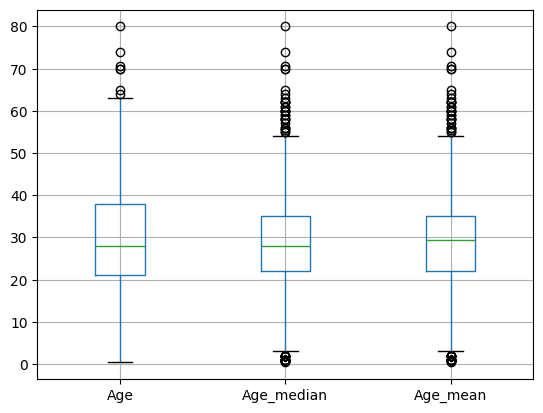

In [20]:
x_train[['Age','Age_median','Age_mean']].boxplot()

<Axes: >

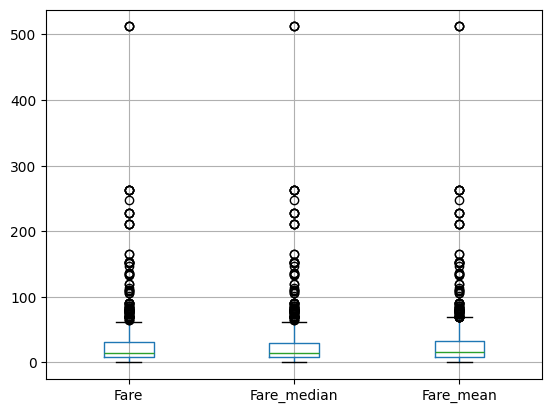

In [21]:
x_train[['Fare','Fare_median','Fare_mean']].boxplot()

# **Using Sklearn**

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [23]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [24]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')


In [25]:
trf.fit(x_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [28]:
trf.named_transformers_['imputer1'].statistics_


array([28.75])

In [29]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [30]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)

In [31]:
x_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

# **3.Arbitrary Value Imputation**

In [32]:
df = pd.read_csv('titanic_toy.csv')

In [33]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [34]:
df.isnull().mean()

,0
Age,0.198653
Fare,0.050505
Family,0.000000
Survived,0.000000


In [35]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [37]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [38]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  204.3495133904614
Age Variance after 99 wala imputation:  951.7275570187172
Age Variance after -1 wala imputation:  318.0896202624484
Original Fare variable variance:  2448.197913706318
Fare Variance after 999 wala imputation:  47219.20265217623
Fare Variance after -1 wala imputation:  2378.5676784883503


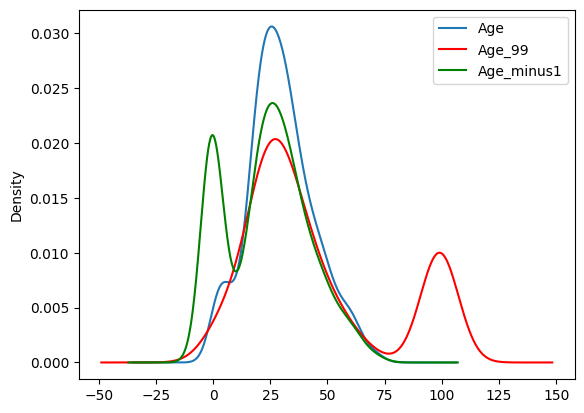

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

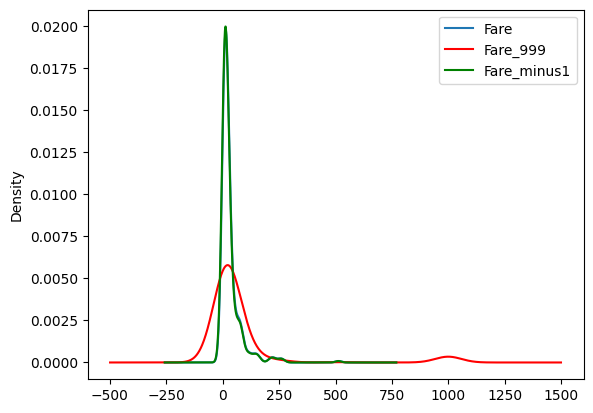

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [41]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678


In [42]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.051179,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.032079,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023857,-0.062687
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514
Fare_999,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946
Fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000


In [43]:
#Using Sklearn



X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [44]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [45]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [46]:
trf.fit(X_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [47]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [48]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [49]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [50]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])

# **4.End of Distribution Imputation**

# **5.Random Sample Imputation**

# **6.Automatically select best imputation technique**